### Knapsack problem

- Motivation
    - Example 1: Imagine you are given a timeslot (3 mins), and you are given a set of TV commercials. For each commercial you know its (i) revenue and (ii) duration. Select a set of commercials within this timeslot such that revenue is maximised
    - Example 2: Given a fixed budget, purchase computers for a data center to achieve maximum performance 

- The general problem is the `knapsack problem`
    - You have a set of items, with associated value and cost
    - You have a knapsack, which can take a maximum cost
    - Fill the knapsack with the items, such that we maximise value given cost
    
- There are a few classes of knapsack problems
    - Fractional  
        - Can be solved with greedy algorithm
    - Discrete
        - **Cannot** be solved with greedy algorithm
        - With repetitions (unlimited quantities)
        - Without repetitions (1 of each item) 

- Example:
    - Capacity: 10
    - Items: 
        a. Weight: 6, Value: $30
        b. Weight: 3, Value: $14
        c. Weight: 4, Value: $16
        d. Weight: 2, Value: $9

    - If we have a discrete w/o repeats, optimal combination is a + c, giving value of $46
    - If we have a discrete w repeats, optimal combination is a + d + d, giving value of $48
    - If we have a fractional, optomal combination is a + b + 0.5 c, giving $48.5

- We know greedy algorithm fails for knapsack for the same reason it fails for coin changing; it is possible that combination of lower value items can yield more optimal combination (especially if the greedy algorithm leads to empty space in knapsack)

### Knapsack with Repetitions using DP

- Problem: Given a set of items with values $v_1 ... v_n$ and weights $w_1 ... w_n$, find the best combination that maximises $\sum_i v_i$ without exceeding weight $W$. There are unlimited quantities of each item
    - **Inputs:** $w_1...w_n$, $v_1, v_n$, total weight $W$
    - **Outputs:** maximum value of items whose weights does not exceed $W$

- Let's identify the subproblem to eventually form the recursion of interest
    - Imagine you have some optimal solution that contains item with weight $w_i$ out of total weight $W$
    - If we remove this item, the collection items of weight $W - w_i$ must be an optimal solution for subproblem with total weight $W - w_i$
    - Let's imagine it was not optimal; that means that if I make a substitution and back $w_i$, I can get a greater total value, which means that the first statement (that it is an optimal solution) must be wrong
    - Therefore, for any given optimal solution, removal of an item from the set must yield an optimal solution for the lower weight
    - Therefore, if we know the optimal combinations for lower weights, we can build up to an optimal solution for higher weights

In [54]:
weight_limit = 10
item_values = [30, 14, 16, 9]
item_weights = [6, 3, 4, 2]
min_weight = min(item_weights)
cache = {}
for i in range(min_weight):
    cache[i] = 0

def knapsack_recurs(weight_limit):
    '''
    Time complexity: O(W * N) where W is weight limit and N is number of items
    Space complexity: O(W) because we add a stack frame in memory every time we do a recursion, and the depth of the recursion depends on the size of the weight limit
    '''
    # print('='*50)
    # print(f"{weight_limit=}")
    if weight_limit < 0:
        return 0
    if weight_limit in cache:
        return cache.get(weight_limit)

    all_values = [
        knapsack(weight_limit - item_weights[i]) + item_values[i] if (weight_limit - item_weights[i] >= 0) else 0
        for i in range(len(item_weights))
    ]
    # print(all_values)
    cache[weight_limit] = max(all_values)

    return cache[weight_limit]

def knapsack_iter(weight_limit):
    '''
    Time complexity: O(W * N) where W is weight limit and N is number of items
    Space complexity: O(1) because nothing new is created in each iteration
    '''
    if weight_limit < 0:
        return 0
    if weight_limit in cache:
        return cache.get(weight_limit)

    for weight in range(min_weight, weight_limit+1):
        bestval = 0
        for i in range(len(item_values)):
            if item_weights[i] <= weight:
                val = cache.get(weight - item_weights[i]) + item_values[i]
                if val > bestval:
                    bestval = val
        cache[weight] = bestval

    return cache[weight_limit]
        
weight_limit=1000000
# print(knapsack_recurs(weight_limit))
# print(knapsack_iter(weight_limit))

4999998


### Knapsack without Repetititions with DP

- Let there be items of values $[v_1, v_2, v_3, v_4]$ and weights $[w_1, w_2, w_3, w_4]$. Let the total weight of the bag we want to fill be $W$. What is the value of the optimal combination of items with weight $W$?

- This is actually quite tricky, so let's think through the steps
    - The knee jerk here is to build up brute force your way for every value of $W$
        - Obviously, this isn't ideal, with $N$ items, you incur runtime of $O(N^2)$
        - Not only that, there is no guarantee that the optimal solution for $W$ will be built on the optimal solution for $W-1$
            - For example, the optimal solution for weight=6 may be a single item of weight 6, but the optimal solution for weight=7 may be 2 items with weight 3+4
            - So you need to run a $O(n^2)$ search for every sub value, defeating the purpose of a DP solution

- So if the above doesn't work, what is the sub-problem then?
    - Let's assume we have some optimal solution that comprises $v_4$. We can write this as $\{..., v_4\}$, with weight $W(\{..., v_4\}) = W$
        - By definition, if $\{..., v_4\}$ is an optimal solution for $W$, then $\{..., v_4\}$ must be an optimal solution for $W - w_4$ with value $V(\{..., v_4\})$
        - By definition, if optimal solution for $W$ does not comprise $v_4$, then optimal value must be $V(\{...\})$

    - The DP solution here takes a 2D table. The columns $W$ represent the various weights, and the rows $i$ represent the the array of items up to item $i$
        - That is, cell $(i=2, w=10)$ refers to the maximum value we can get using items $i_1, i_2$ if the maximum weight $w=10$
        
        | | w=0 | w=1 | ... | 
        | - | - | - | - |
        | i=0 | | | |
        | i=1 | | | |
        | i=2 | | | |
        | i=3 | | | |
        | i=4 | | | |

    - **EMPHASIS:** the cell $(i=2, w=10)$ does NOT refer to the best possible combination among ALL items, only up to item $i=2$ 
        - By the time out iteration reaches the desired $W$ and row $i=4$, we will have the optimal value 
        - Many intermediate paths are possible, depending on the arrangement of the item array
        - But there is only 1 way to have all $N$ items anyway, so the answer is unique!

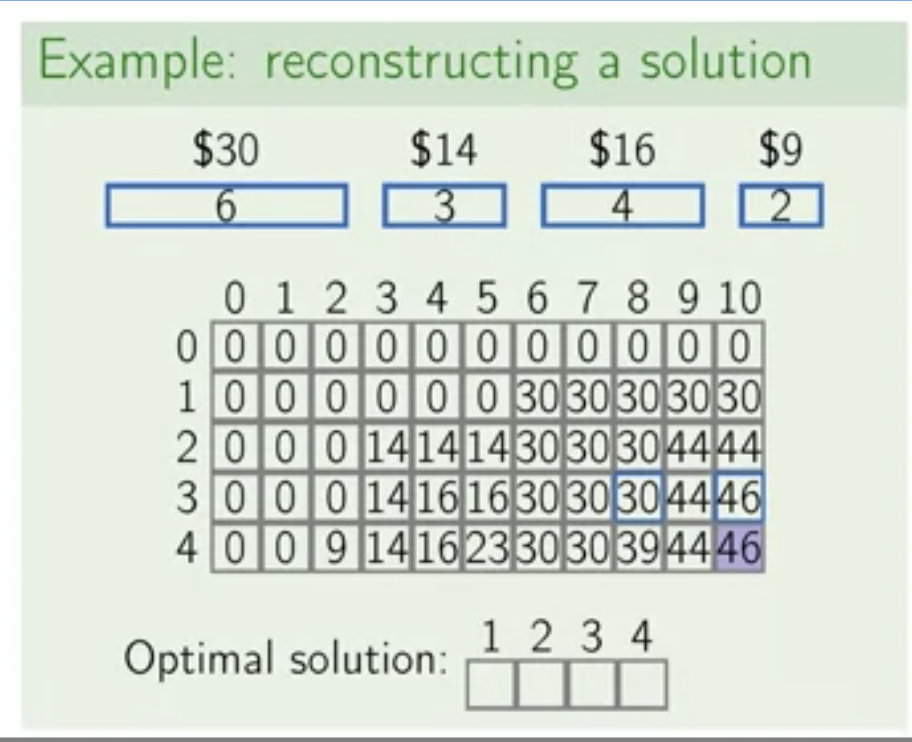

- How does this memoization relate to our sub problem?
    - Let's start from the highlighted cell at the bottom right, we know that cell $(i=4, w=10) = 46$ is the final answer 
    - To fill in this cell, we know that we're trying to add element $i=4$. Either we use element $i=4$, or we don't use it
        - If we use it, for the weight to be 10, we must previously be at cell $(i=3, w=8) = 30$. Adding element $i=4$ gives us value 30+9 = 39
        - If we DON'T use it, for the weight to be 10, we must previously be at cell $(i=3, w=10) = 46$. 
        - It is optimal for us to not use it, because 46 > 39, so the optimal subset before $(i=3, w=8)$ must be at $(i=3, w=10)$
        - So we know that the optimal subset at $(i=3, w=8)$ does not contain the 4th element!

    - Let's trace back again from $(i=3, w=10)$. We know that we are deciding whether or not to use element 3 in this subset.
        - If we use element 3, for the weight to be 10, we must previously be at cell $(i=2, w=6) = 30$, and final value at $(i=2, w=10) = 30 + 16 = 46$
        - If we DON'T use element 3, for the weight to be 10, we must previously be at cell $(i=2, w=10) = 30$, and value at $(i=2, w=10) = 44$
        - So it is better to use element 3, and the optimal subset at $(i=3, w=10)$ must contain element 3!
    
    - Tracing back in the same manner from $(i=2, w=6) = 30$ etc...

In [76]:
item_weights = [6,3,4,2]
item_values = [30,14,16,9]
def knapsack_without_repetition(weight_limit, return_memoize=False):
    mem = [[0 for _ in range(weight_limit+1)] for _ in range(len(item_weights)+1)]
    for i in range(1,len(item_weights)+1):
        for j in range(1,weight_limit+1):
            if item_weights[i-1] <= j:
                newval = mem[i-1][j-item_weights[i-1]] + item_values[i-1]
                if newval > mem[i-1][j]:
                    mem[i][j] = newval
                else:
                    mem[i][j] = mem[i-1][j]
    # return mem
    if return_memoize:
        return mem[len(item_weights)][weight_limit], mem   
    return mem[len(item_weights)][weight_limit]

value, mem = knapsack_without_repetition(10, return_memoize=True)

In [91]:
item_weights = [6,3,4,2]
item_values = [30,14,16,9]

def track_optimal_solution(mem):
    curr_row, curr_col = len(mem)-1, len(mem[0])-1
    curr_elem = mem[curr_row][curr_col]
    elem_used = [0 for _ in range(len(item_weights))]
    for i in range(len(item_weights), 0, -1):
        value_if_use_ith_item = mem[curr_row-1][curr_col]
        value_if_not_use_ith_item = mem[curr_row-1][curr_col-item_weights[i-1]] + item_values[i-1]
        if value_if_not_use_ith_item > value_if_use_ith_item:
            curr_col = curr_col-item_weights[i-1]
            elem_used[i-1] = 0
        else:
            elem_used[i-1] = 1
        
        curr_row -= 1

    return elem_used

track_optimal_solution(mem)

[0, 1, 0, 1]

### Is iterative vs recursive approach faster?

- Depends

- Iterative approach lets you avoid the memory problems from maintaining multiple stack frames in-memory, which will speed things up when you have a very deep call tree. So assuming you need to solve every subproblem, iterative is MUCH better than recursive

- Recursive approach might be faster when you don't need to solve every sub problem. In iterative approach, you have a loop, so you have no choice but to solve all subproblems. 

### Why is a knapsack problem PseudoPolynomial and not Polynomial?

- The running time is O(NW) for an unbounded knapsack problem with N items and knapsack of size W. W is not polynomial in the length of the input though, which is what makes it pseudo-polynomial.

- Consider W = 1,000,000,000,000. It only takes 40 bits to represent this number, so input size = 40, but the computational runtime uses the factor 1,000,000,000,000 which is $O(2^{40})$.

- So the runtime is more accurately said to be $O(N \cdot 2 ^{\text{bits in W}})$, which is exponential.

- https://stackoverflow.com/questions/4538581/why-is-the-knapsack-problem-pseudo-polynomial#answer-4538668

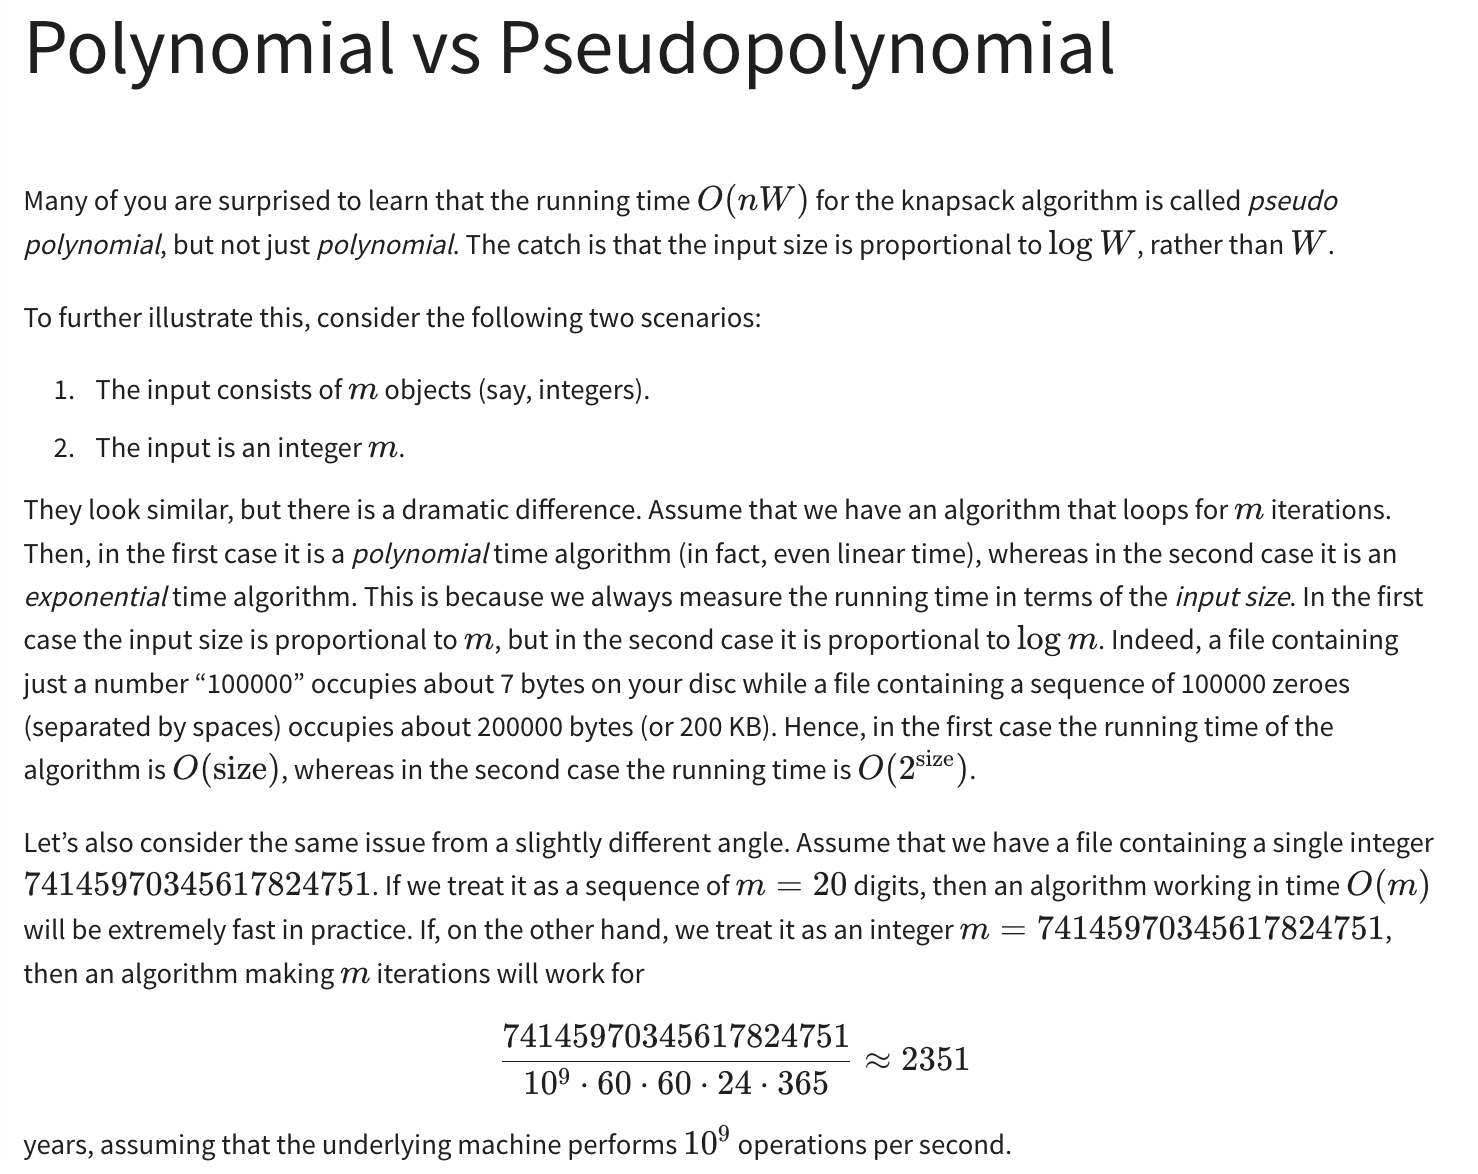